In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:

In [3]:
data=pd.read_csv(r"C:\Users\amiad\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
data.isnull().any().any()

np.False_

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.shape

(7043, 21)

<Axes: >

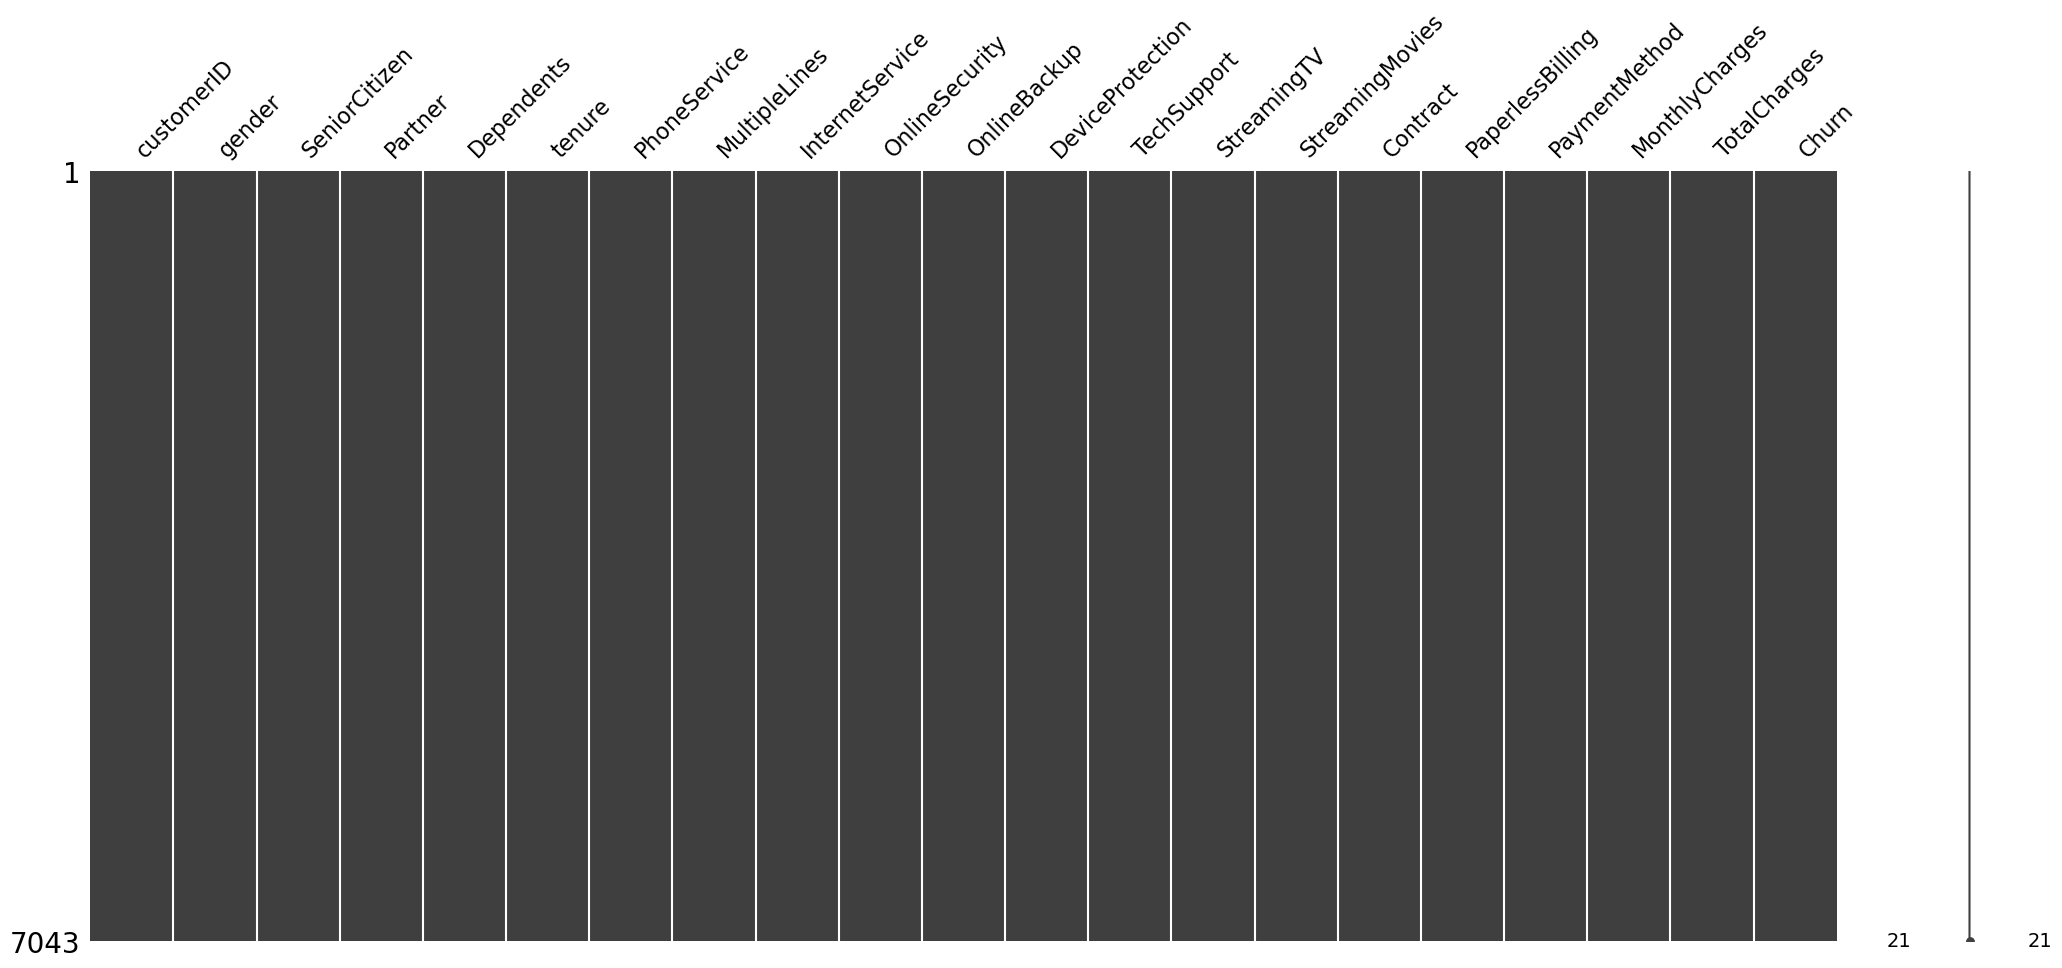

In [7]:
import missingno as msno
msno.matrix(data)

In [8]:
data = data.drop(["customerID"], axis = 1)
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [9]:
data[data["TotalCharges"] == ' ']

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [10]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
data[data['tenure']==0].count()

gender              11
SeniorCitizen       11
Partner             11
Dependents          11
tenure              11
PhoneService        11
MultipleLines       11
InternetService     11
OnlineSecurity      11
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges         0
Churn               11
dtype: int64

In [12]:
data.drop(labels=data[data["tenure"] == 0].index, axis = 0, inplace = True)

In [13]:
data.fillna(data["TotalCharges"].mean())

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7032 rows x 20 columns]

In [14]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
data.SeniorCitizen.unique()

array([0, 1])

In [16]:
data.SeniorCitizen = data.SeniorCitizen.map({0: "No", 1: "Yes"})
data.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

EDA

In [17]:
type_ = ["No", "yes"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=data['Churn'].value_counts(), name="Churn"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [18]:
data[data['Churn'] == 'No'].groupby('gender').size()

gender
Female    2544
Male      2619
dtype: int64

In [19]:
data[data['Churn'] == 'Yes'].groupby('gender').size()

gender
Female    939
Male      930
dtype: int64

Customer distribution w.r.t gender

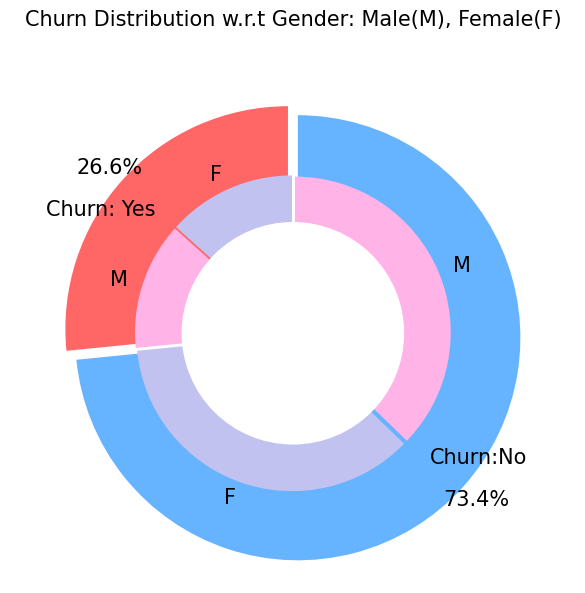

In [20]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [21]:
fig = px.histogram(data, x="Churn", color = "Contract", barmode = "group", title = "<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

Customers with monthly contract are more likely to churn 

In [22]:
labels = data['PaymentMethod'].unique()
values = data['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

fig = px.histogram(data, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [23]:
 data[data["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [24]:
 data[data["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [25]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [26]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(data, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [27]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [28]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [29]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [30]:
fig = px.histogram(data, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [31]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

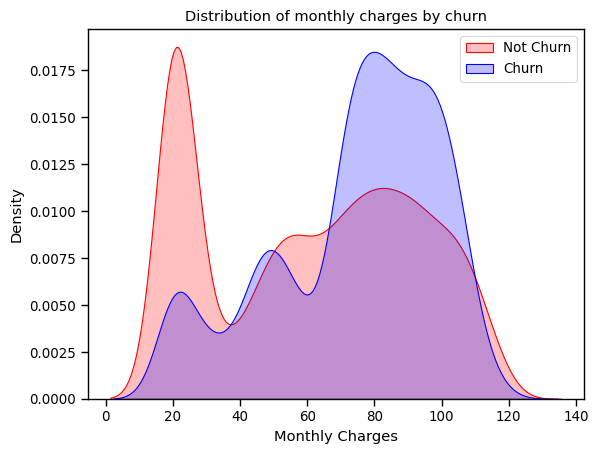

In [32]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

Customers with higher monthly charges are more likely to churn 

In [33]:
fig = px.box(data, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

New customers are more likely to churn 

In [34]:
data_copy=data.copy()

In [35]:
#Create a label encoder object
le= LabelEncoder()
#Label Encoding will be used for columns with 2 or less unique

le_count=0
for col in data.columns[1:]:
    if data[col].dtype =='object':
        #Agar data[col] ki length 2 ke equal ya choti hai
        if len(list(data[col].unique()))<=2:
            le.fit(data[col])
            data[col]=le.transform(data[col])
            le_count+=1
print('{} columns were label encoded.' .format(le_count))
        

6 columns were label encoded.


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

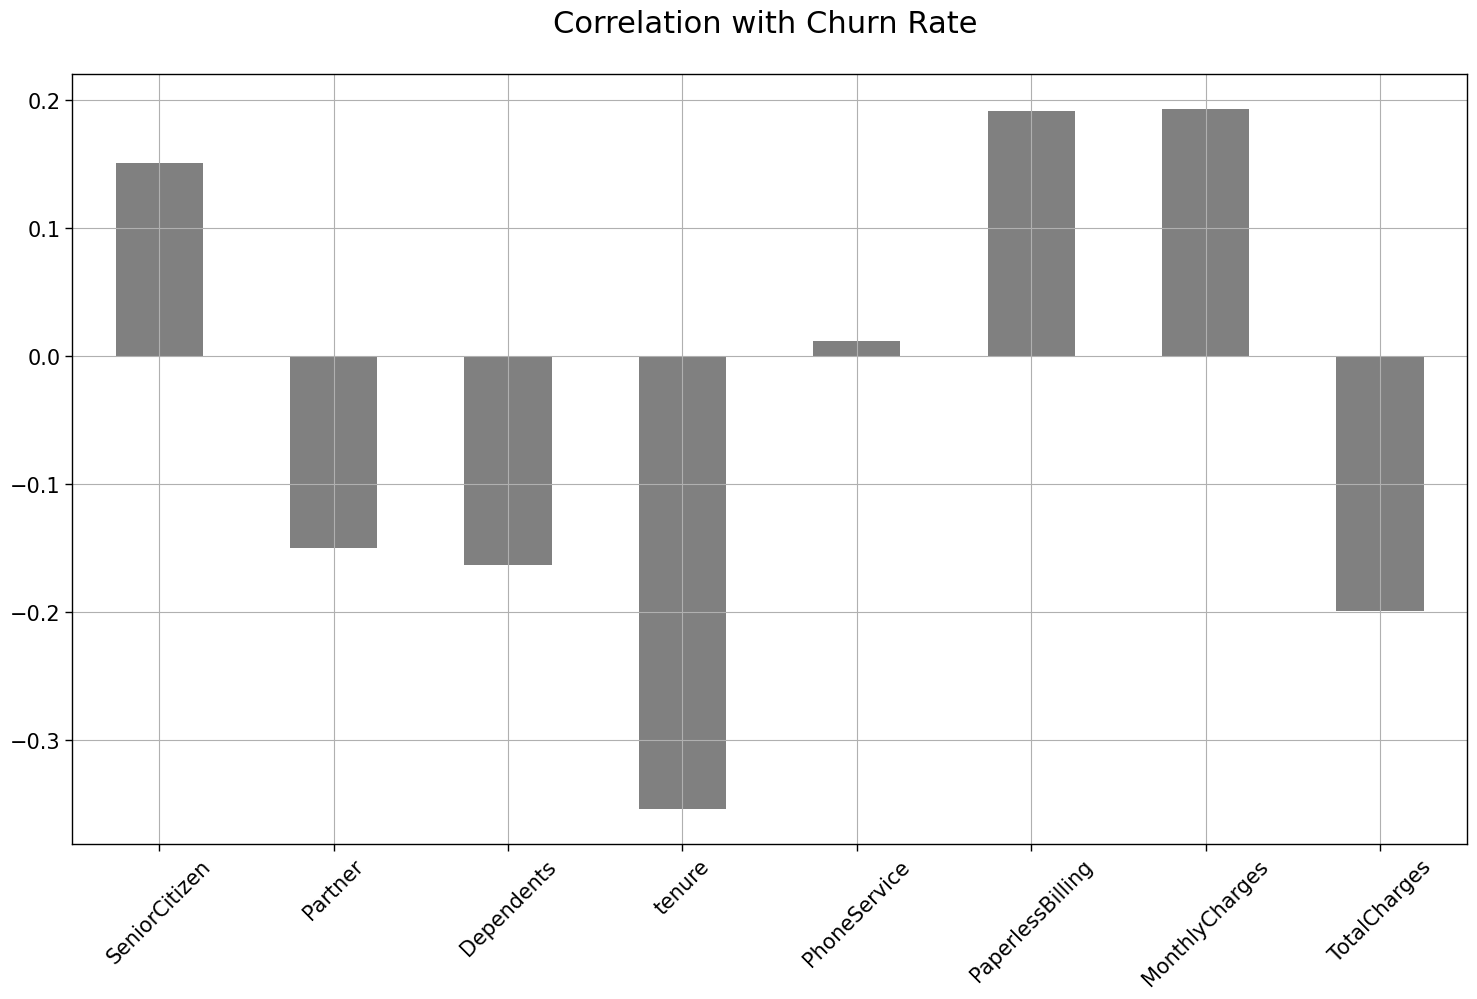

In [36]:
data2 = data[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]
correlations=data2.corrwith(data['Churn'])
correlations= correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'grey',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

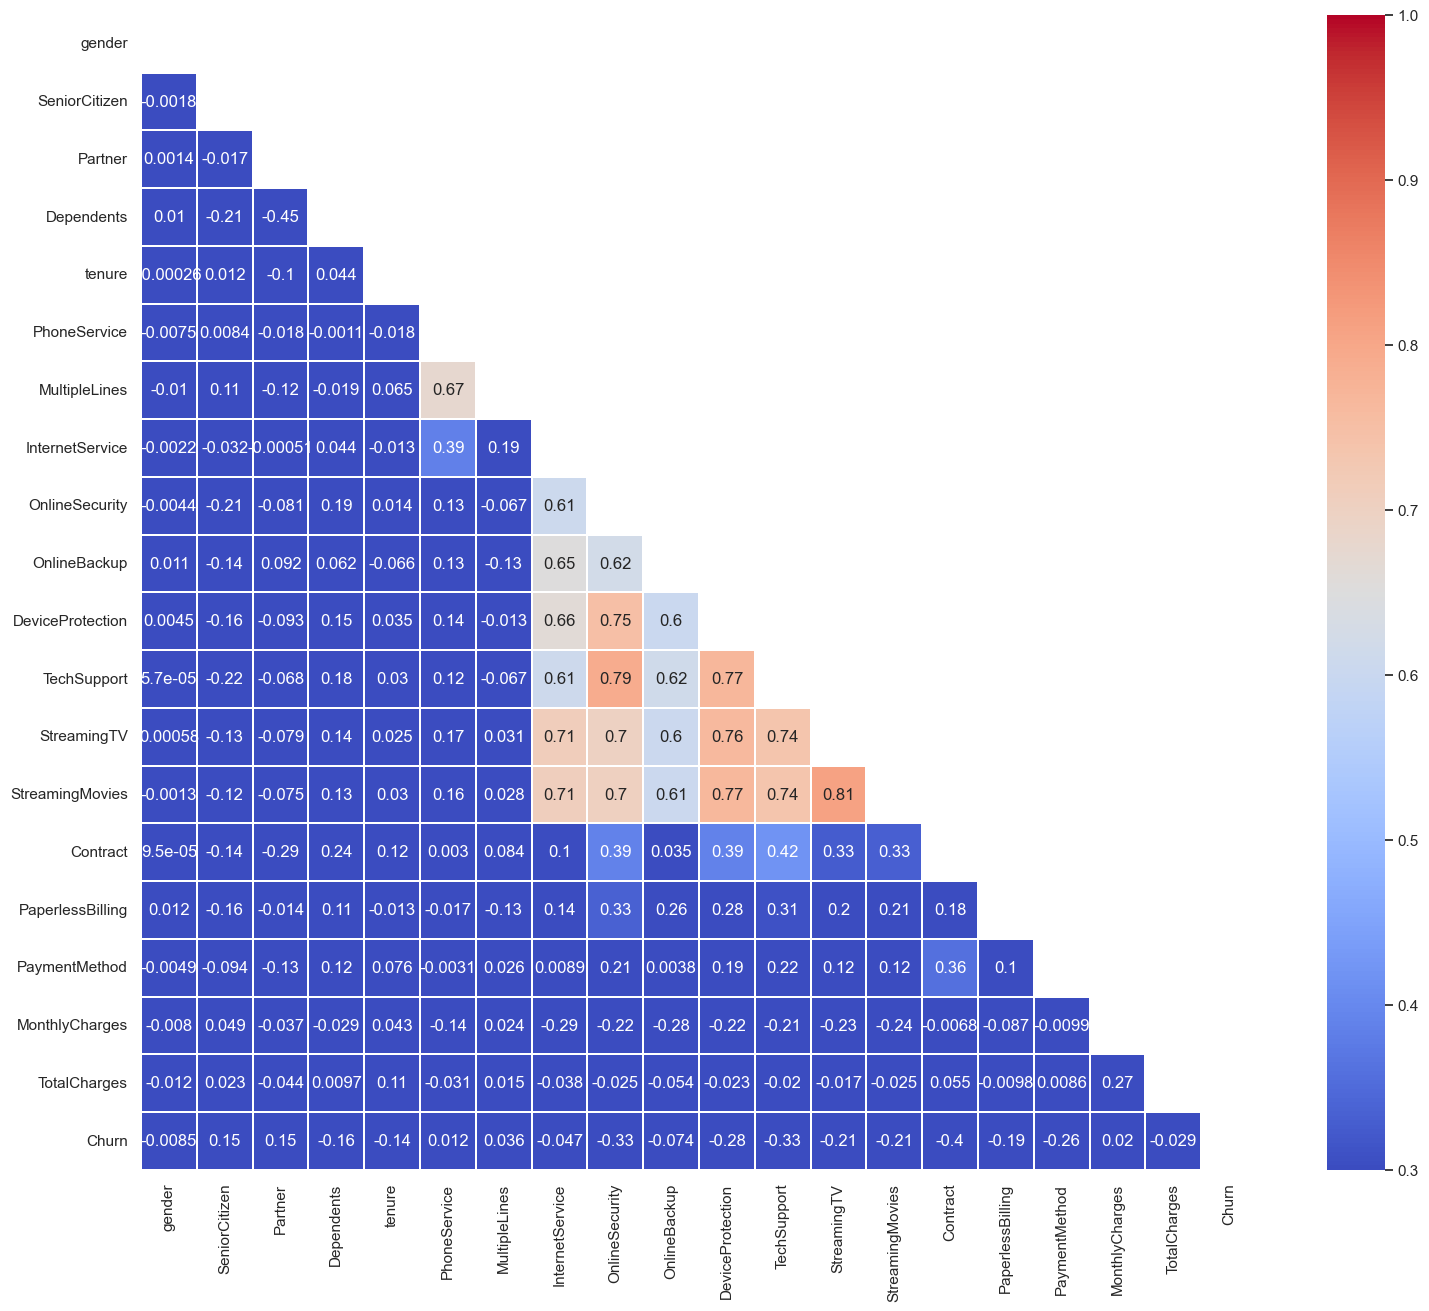

In [37]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
plt.figure(figsize=(18, 15))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)

<Axes: >

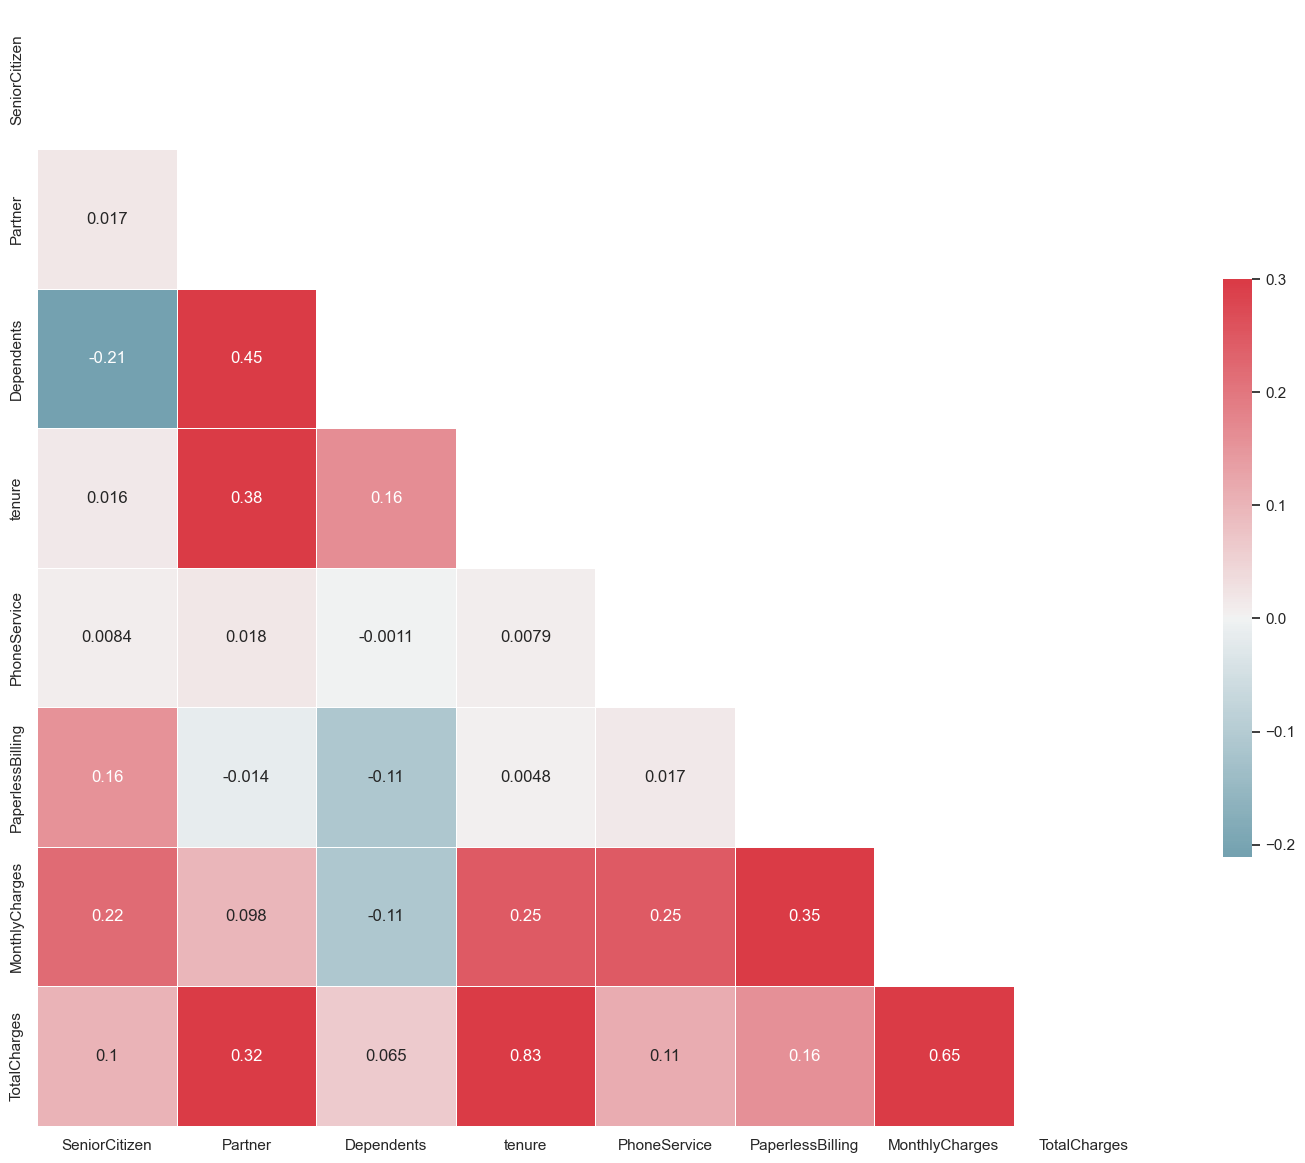

In [38]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = data2.corr()

#Generate a mask for the upper triangle:

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True,annot = True, linewidths=.5, cbar_kws={"shrink": .5})

In [39]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

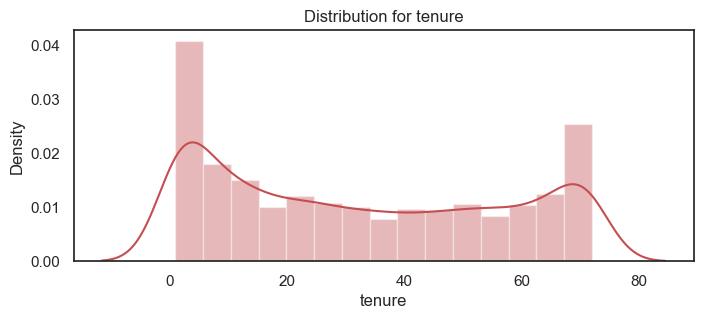

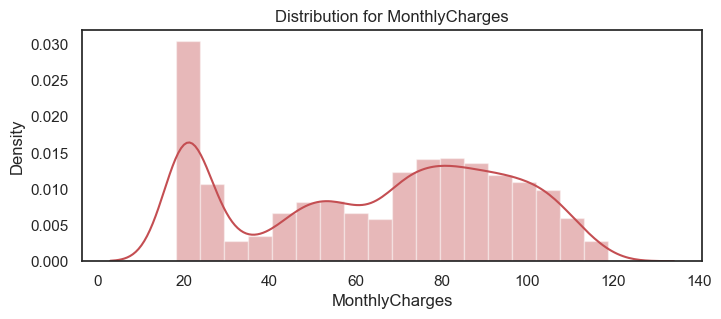

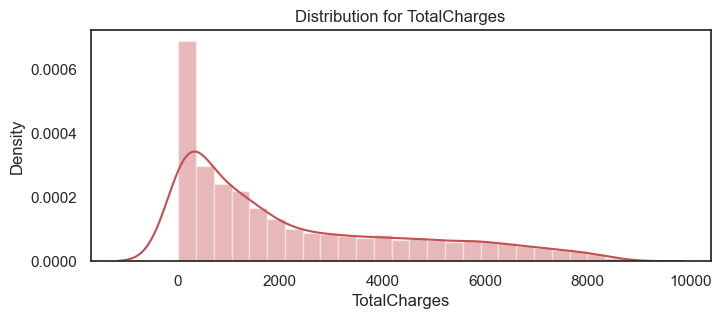

In [40]:
col =  ["tenure", 'MonthlyCharges', 'TotalCharges']
for features in col :distplot(features, data)

The features need standard scaling as all them are distributed over different range values

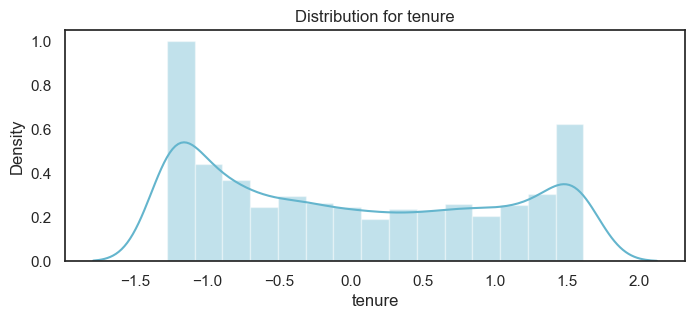

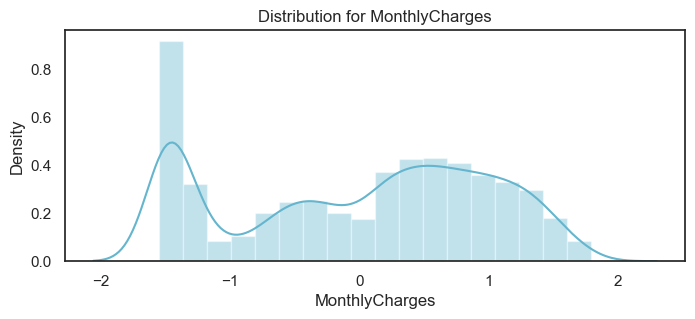

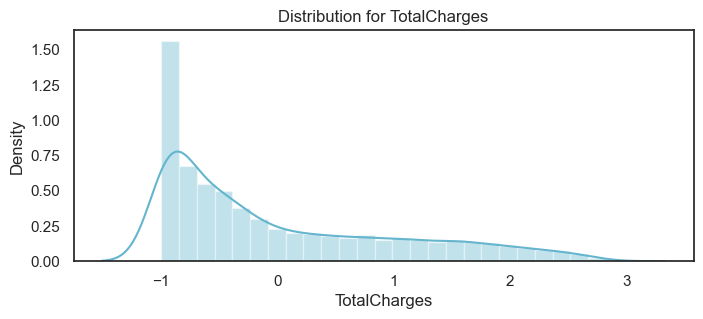

In [41]:
data_std = pd.DataFrame(StandardScaler().fit_transform(data2[col]).astype('float64'),columns=col)
for feat in col:
    distplot(feat, data_std, color='c')

In [42]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [43]:
for i in data_copy.columns:
    print(i, ": ", data_copy[i].unique())

gender :  ['Female' 'Male']
SeniorCitizen :  ['No' 'Yes']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95

In [57]:
X=data_copy.drop(columns='Churn')
y=data_copy['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=4, stratify=y
)

In [58]:
nums_cols=X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols=X_train.select_dtypes(include=['object']).columns.tolist()

In [60]:

# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(nums_cols) - set(cat_cols_ohe)) #those that need label encoding

print(cat_cols_le)

['StreamingTV', 'PhoneService', 'OnlineBackup', 'MultipleLines', 'TechSupport', 'OnlineSecurity', 'SeniorCitizen', 'DeviceProtection', 'StreamingMovies', 'Dependents', 'Partner', 'gender', 'PaperlessBilling']


Column Transformer

In [61]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor= ColumnTransformer(transformers=[
    ('num',StandardScaler(), nums_cols),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols_ohe),
    ('le', OrdinalEncoder(), cat_cols_le)
])

In [62]:
from sklearn.pipeline import Pipeline

models = [
    ("Logistic Regression",
     LogisticRegression(solver="liblinear", class_weight="balanced", random_state=0)),
    ("Linear SVC",
     SVC(kernel="linear", probability=True, random_state=0)),
    ("RBF SVM",
     SVC(kernel="rbf", probability=True, random_state=0)),
    ("KNN",
     KNeighborsClassifier(n_neighbors=5)),
    ("Gaussian NB",
     GaussianNB()),
    ("Decision Tree",
     DecisionTreeClassifier(criterion="entropy", random_state=0)),
    ("Random Forest",
     RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)),
    ("AdaBoost",
     AdaBoostClassifier()),
    ("Gradient Boosting",
     GradientBoostingClassifier()),
    ("Voting Classifier",
     VotingClassifier(estimators=[
         ("gbc", GradientBoostingClassifier()),
         ("lr",  LogisticRegression()),
         ("abc", AdaBoostClassifier())
     ], voting="soft"))
]

pipelines = [
    (name, Pipeline([("preprocessor", preprocessor), ("classifier", clf)]))
    for name, clf in models
]


In [63]:
results=pd.DataFrame(
    columns=["Algorithm","ROC AUC Mean","ROC AUC STD","Accuracy Mean","Accuracy STD"]    
)

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

for i, (name, pipeline) in enumerate(pipelines):
    acc = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring="accuracy")
    auc = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring="roc_auc")

    results.loc[i] = [
        name,
        round(auc.mean()*100, 2), round(auc.std()*100, 2),
        round(acc.mean()*100, 2), round(acc.std()*100, 2)
    ]

results.sort_values(by="ROC AUC Mean", ascending=False)


Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD
9    Voting Classifier         84.83         1.25          80.01          2.06
7             AdaBoost         84.62         1.32          79.85          1.79
8    Gradient Boosting         84.43         1.31          79.50          1.86
0  Logistic Regression         84.41         1.29          74.75          1.46
1           Linear SVC         83.07         1.16          79.34          1.44
4          Gaussian NB         82.73         1.98          73.93          1.96
6        Random Forest         82.48         2.12          78.40          1.96
2              RBF SVM         79.97         1.40          79.46          1.99
3                  KNN         77.63         2.61          76.03          1.82
5        Decision Tree         65.79         2.84          73.22          2.16

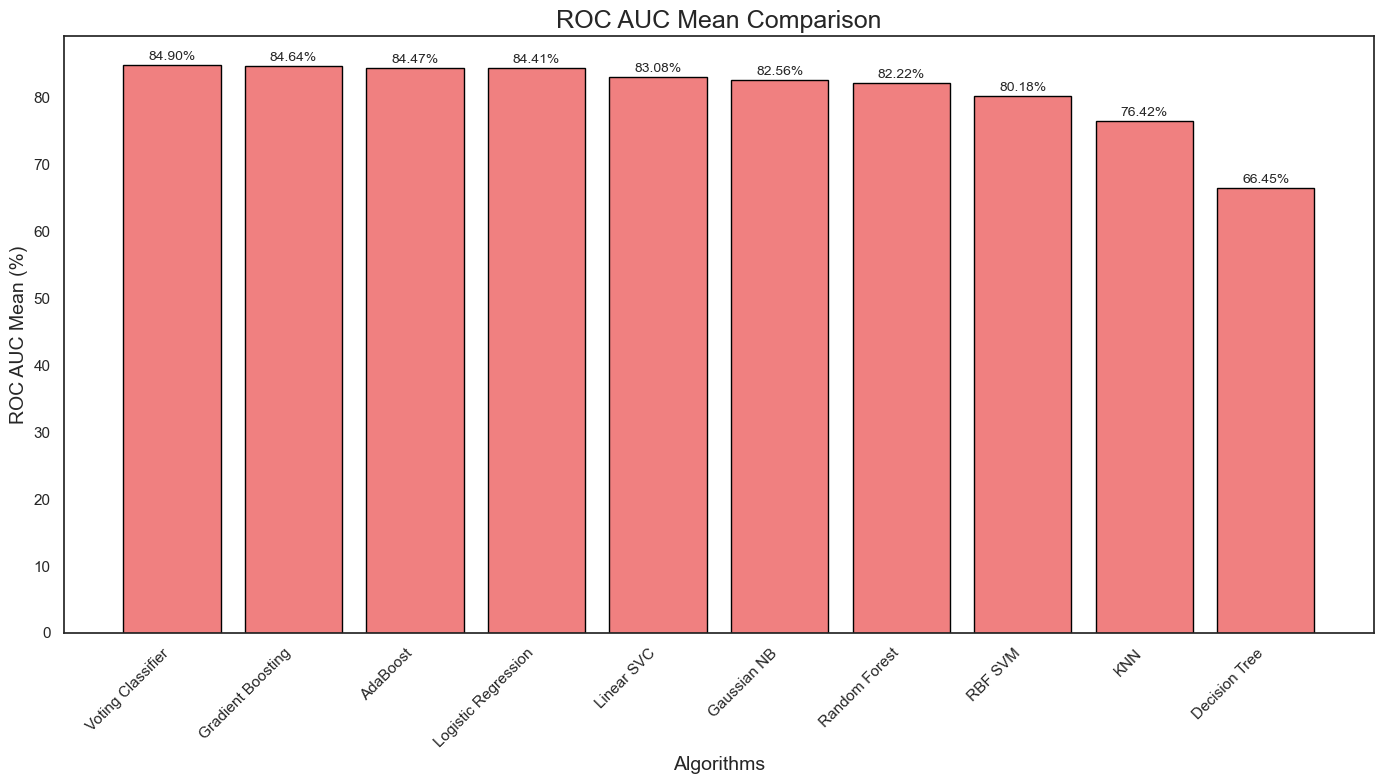

In [64]:
import matplotlib.pyplot as plt

# Names and ROC AUC means from your table
names = [
    "Voting Classifier",
    "Gradient Boosting",
    "AdaBoost",
    "Logistic Regression",
    "Linear SVC",
    "Gaussian NB",
    "Random Forest",
    "RBF SVM",
    "KNN",
    "Decision Tree"
]

roc_auc_means = [84.90, 84.64, 84.47, 84.41, 83.08, 82.56, 82.22, 80.18, 76.42, 66.45]

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(names, roc_auc_means, color='lightcoral', edgecolor='black')

# Labels and title
ax.set_ylabel('ROC AUC Mean (%)', fontsize=14)
ax.set_xlabel('Algorithms', fontsize=14)
ax.set_title('ROC AUC Mean Comparison', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Annotate bars with values
for bar, val in zip(bars, roc_auc_means):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
            f'{val:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [65]:
from sklearn import model_selection
import pandas as pd

# Decide the source list: prefer `pipelines`; fallback to `models`
try:
    source = pipelines  # list of (name, pipeline)
except NameError:
    source = models     # list of (name, estimator)

acc_results = []
auc_results = []
names = []

result_col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD"]
model_results = pd.DataFrame(columns=result_col)

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)

for i, (name, estimator) in enumerate(source):
    names.append(name)

    cv_acc_results = model_selection.cross_val_score(
        estimator, X_train, y_train, cv=kfold, scoring="accuracy"
    )
    cv_auc_results = model_selection.cross_val_score(
        estimator, X_train, y_train, cv=kfold, scoring="roc_auc"
    )

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)

    model_results.loc[i] = [
        name,
        round(cv_auc_results.mean() * 100, 2),
        round(cv_auc_results.std() * 100, 2),
        round(cv_acc_results.mean() * 100, 2),
        round(cv_acc_results.std() * 100, 2),
    ]

# Optional: view sorted table (does not change names/acc_results structures)
model_results = model_results.sort_values(by=["ROC AUC Mean"], ascending=False).reset_index(drop=True)
model_results

Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD
0    Voting Classifier         84.83         1.25          80.01          2.06
1             AdaBoost         84.62         1.32          79.85          1.79
2    Gradient Boosting         84.44         1.32          79.50          1.86
3  Logistic Regression         84.41         1.29          74.75          1.46
4           Linear SVC         83.07         1.16          79.34          1.44
5          Gaussian NB         82.73         1.98          73.93          1.96
6        Random Forest         82.48         2.12          78.40          1.96
7              RBF SVM         79.97         1.40          79.46          1.99
8                  KNN         77.63         2.61          76.03          1.82
9        Decision Tree         65.79         2.84          73.22          2.16

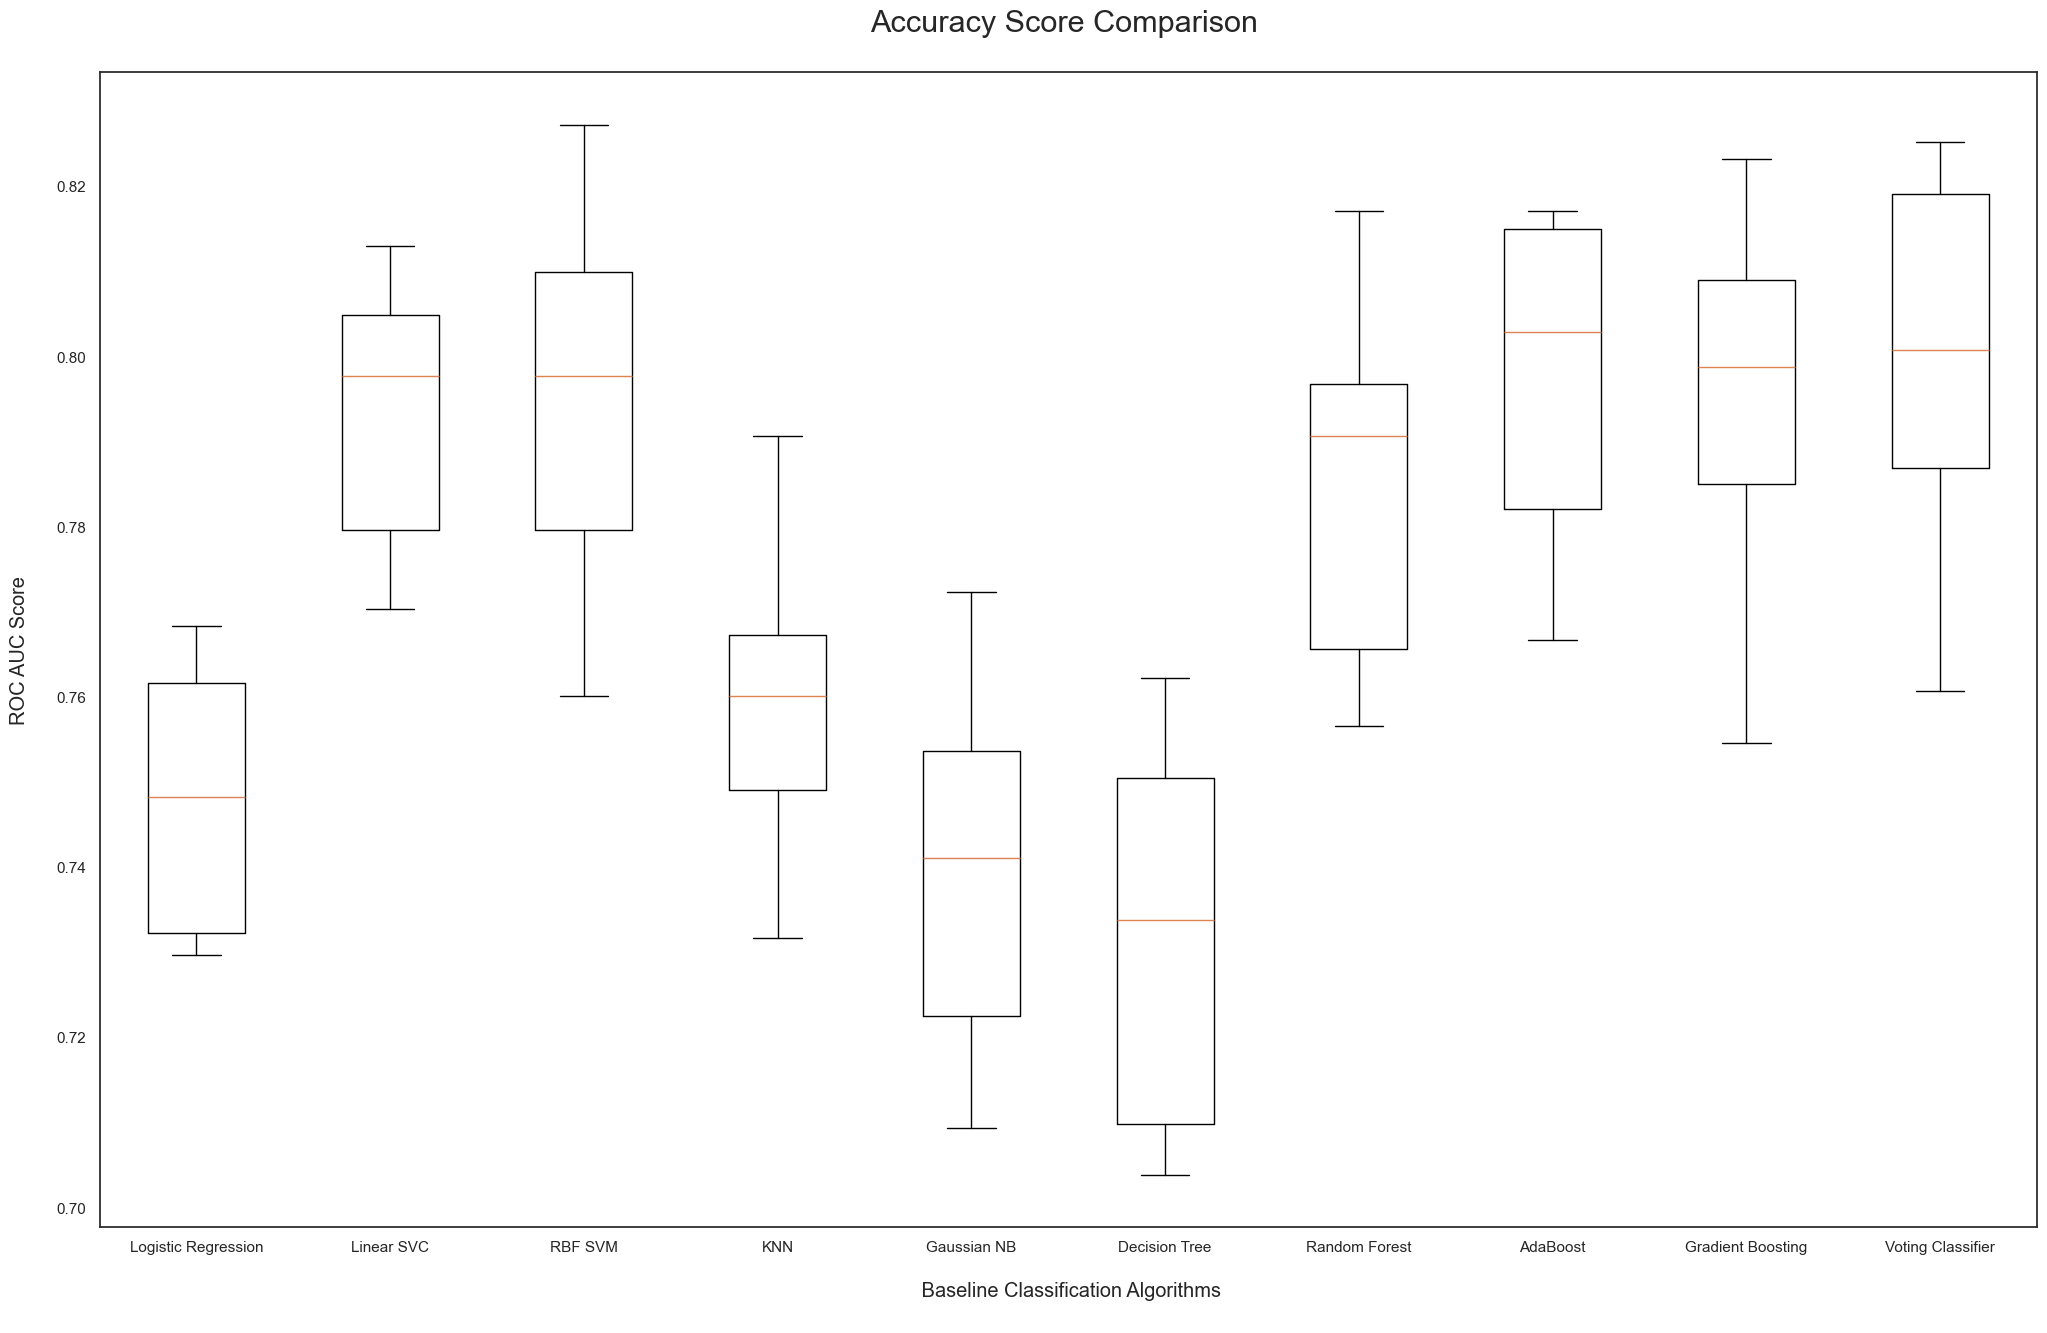

In [66]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


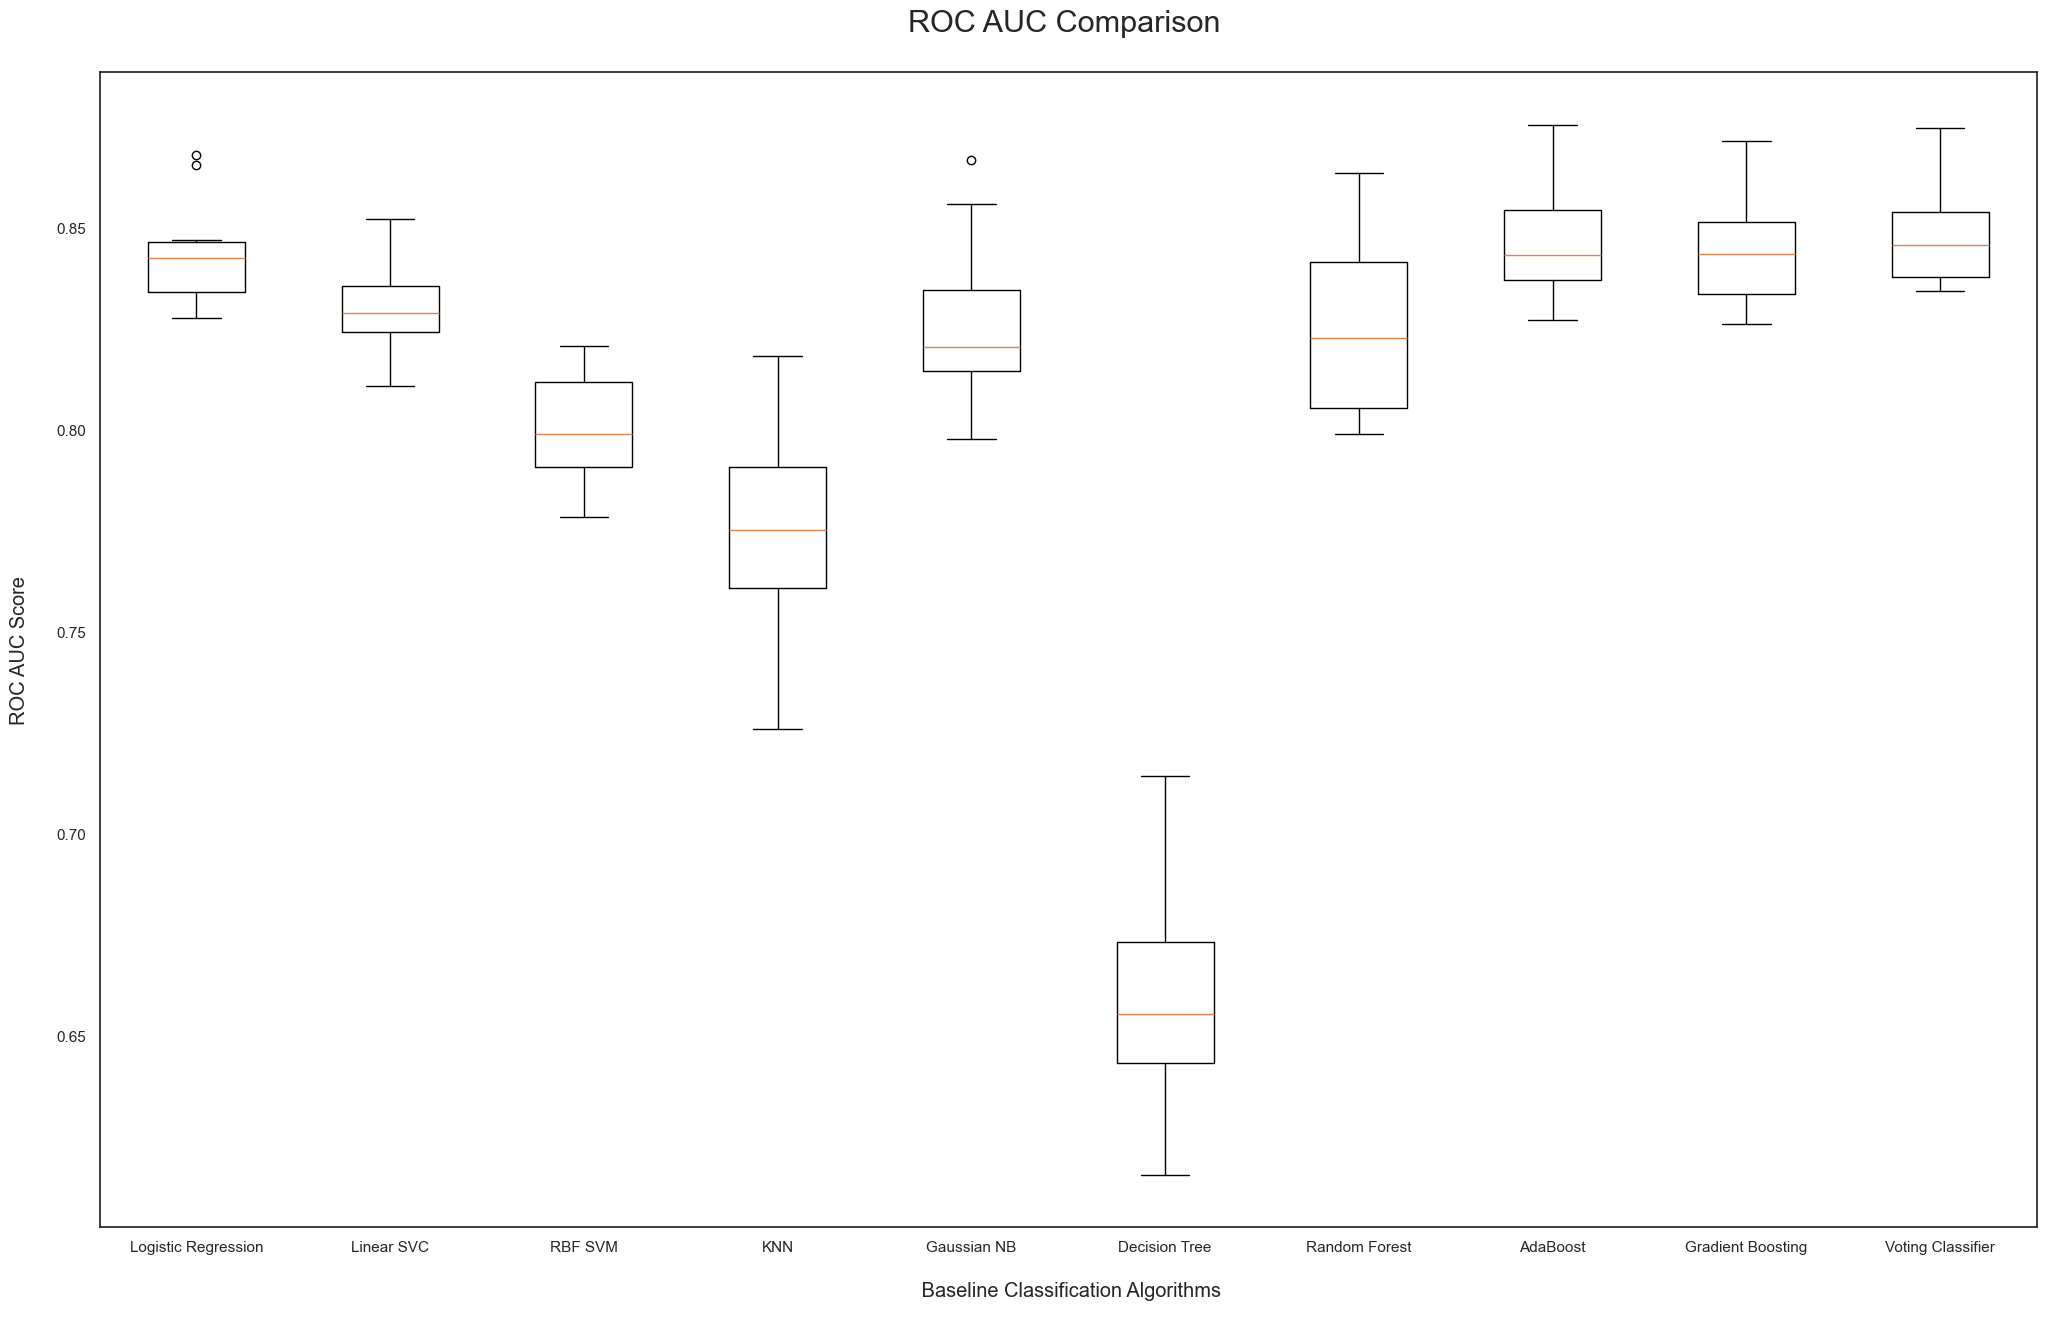

In [67]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('ROC AUC Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


In [71]:
score_array = []
for k in range(1, 25):
    knn_pipeline = Pipeline([
        ("prep", preprocessor),                  # turns strings → numbers
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    knn_pipeline.fit(X_train, y_train)
    score_array.append(knn_pipeline.score(X_test, y_test))


KNN learning plot 

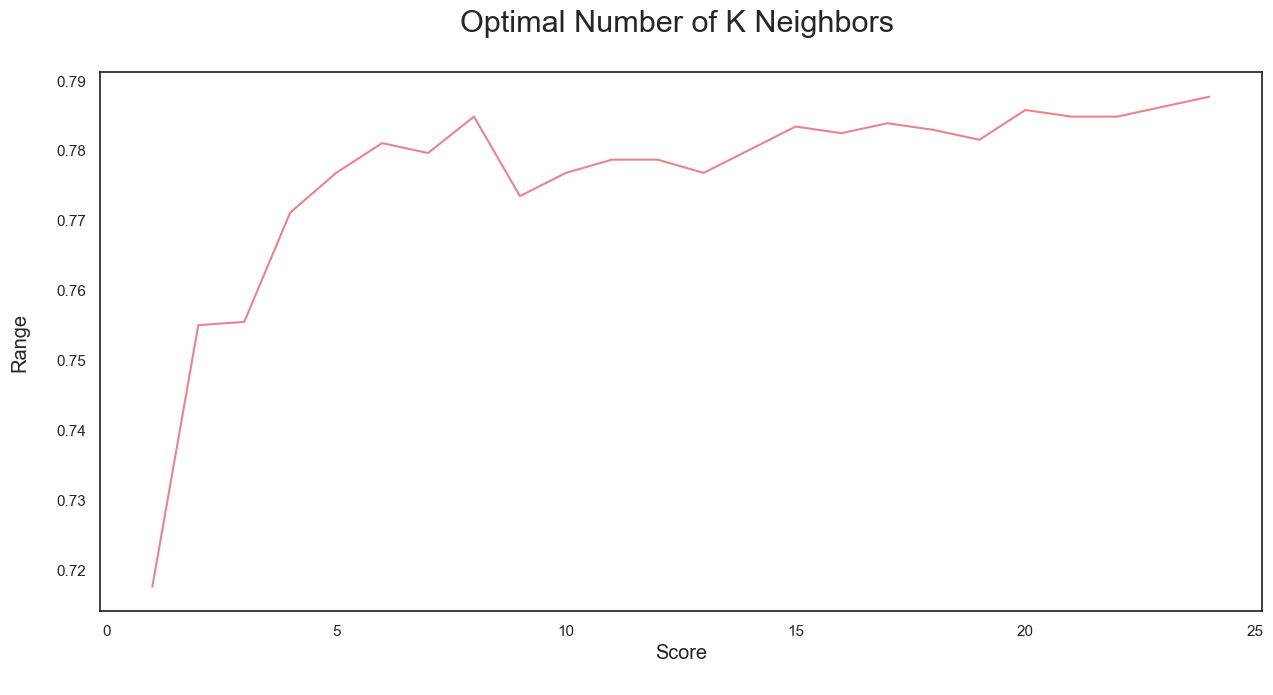

In [72]:
fig=plt.figure(figsize=(15,7))
plt.plot(range(1,25),score_array, color ='#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.title('Optimal Number of K Neighbors \n',horizontalalignment="center", fontstyle = "normal",fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

Random Forest Learning graph

In [74]:
score_array = []

for n in range(1, 100):
    rf_pipeline = Pipeline([
        ("prep", preprocessor),  # your ColumnTransformer
        ("rf", RandomForestClassifier(n_estimators=n, random_state=1))
    ])
    
    rf_pipeline.fit(X_train, y_train)
    score_array.append(rf_pipeline.score(X_test, y_test))

score_array


[0.7279620853080568,
 0.7677725118483413,
 0.7606635071090048,
 0.7805687203791469,
 0.7758293838862559,
 0.7796208530805687,
 0.7701421800947867,
 0.7748815165876777,
 0.7791469194312797,
 0.7805687203791469,
 0.7824644549763033,
 0.7853080568720379,
 0.7872037914691943,
 0.7843601895734598,
 0.7815165876777251,
 0.7819905213270142,
 0.7777251184834123,
 0.7838862559241706,
 0.7796208530805687,
 0.7805687203791469,
 0.7815165876777251,
 0.7834123222748816,
 0.7862559241706161,
 0.7895734597156399,
 0.7881516587677725,
 0.7900473933649289,
 0.7876777251184834,
 0.7890995260663507,
 0.7848341232227488,
 0.7867298578199052,
 0.7848341232227488,
 0.7881516587677725,
 0.7881516587677725,
 0.790521327014218,
 0.7895734597156399,
 0.7914691943127962,
 0.7914691943127962,
 0.7900473933649289,
 0.7876777251184834,
 0.7895734597156399,
 0.7876777251184834,
 0.7876777251184834,
 0.7867298578199052,
 0.7872037914691943,
 0.7876777251184834,
 0.7876777251184834,
 0.7862559241706161,
 0.78720379146

In [75]:
for i,j in enumerate(score_array):
    print(i+1,":",j)

1 : 0.7279620853080568
2 : 0.7677725118483413
3 : 0.7606635071090048
4 : 0.7805687203791469
5 : 0.7758293838862559
6 : 0.7796208530805687
7 : 0.7701421800947867
8 : 0.7748815165876777
9 : 0.7791469194312797
10 : 0.7805687203791469
11 : 0.7824644549763033
12 : 0.7853080568720379
13 : 0.7872037914691943
14 : 0.7843601895734598
15 : 0.7815165876777251
16 : 0.7819905213270142
17 : 0.7777251184834123
18 : 0.7838862559241706
19 : 0.7796208530805687
20 : 0.7805687203791469
21 : 0.7815165876777251
22 : 0.7834123222748816
23 : 0.7862559241706161
24 : 0.7895734597156399
25 : 0.7881516587677725
26 : 0.7900473933649289
27 : 0.7876777251184834
28 : 0.7890995260663507
29 : 0.7848341232227488
30 : 0.7867298578199052
31 : 0.7848341232227488
32 : 0.7881516587677725
33 : 0.7881516587677725
34 : 0.790521327014218
35 : 0.7895734597156399
36 : 0.7914691943127962
37 : 0.7914691943127962
38 : 0.7900473933649289
39 : 0.7876777251184834
40 : 0.7895734597156399
41 : 0.7876777251184834
42 : 0.7876777251184834
43

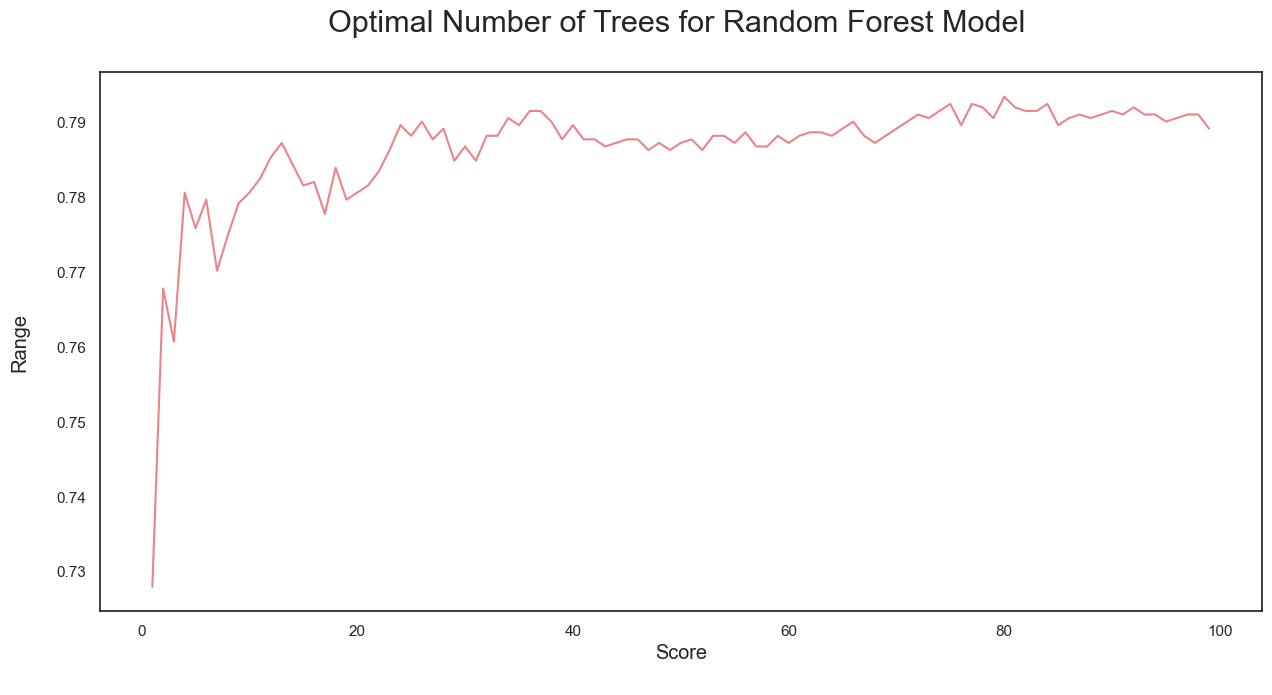

In [76]:

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [83]:
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='Yes')
    rec = recall_score(y_test, y_pred, pos_label='Yes')
    f1 = f1_score(y_test, y_pred, pos_label='Yes')
    f2 = fbeta_score(y_test, y_pred, beta=2.0, pos_label='Yes')

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                           columns=["Model", "Accuracy", "Precision", "Recall", "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending=False)
    return results

In [84]:
eval_list = []
for name, pipe in pipelines:
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    eval_list.append(model_evaluation(y_test, y_pred, name))

metrics_df = pd.concat(eval_list).reset_index(drop=True)
metrics_df = metrics_df.sort_values(by=["Precision", "Recall", "F2 Score"], ascending=False).reset_index(drop=True)
metrics_df

Model  Accuracy  Precision    Recall  F1 SCore  F2 Score
0             AdaBoost  0.808531   0.688249  0.511586  0.586912  0.539271
1    Gradient Boosting  0.804265   0.671296  0.516934  0.584089  0.541854
2    Voting Classifier  0.806635   0.666667  0.545455  0.600000  0.566038
3              RBF SVM  0.794313   0.660759  0.465241  0.546025  0.494505
4           Linear SVC  0.795735   0.645089  0.515152  0.572844  0.536776
5        Random Forest  0.790995   0.640845  0.486631  0.553191  0.511236
6                  KNN  0.776777   0.591837  0.516934  0.551855  0.530358
7  Logistic Regression  0.754502   0.525205  0.798574  0.633663  0.723281
8          Gaussian NB  0.744076   0.512367  0.775401  0.617021  0.703201
9        Decision Tree  0.733649   0.499139  0.516934  0.507881  0.513274

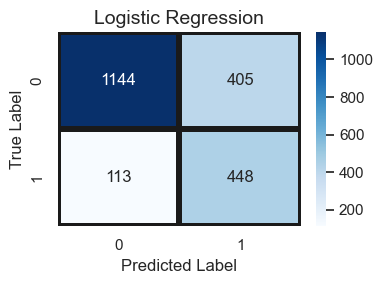

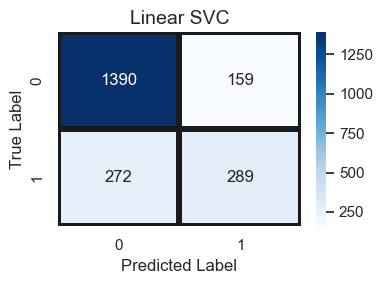

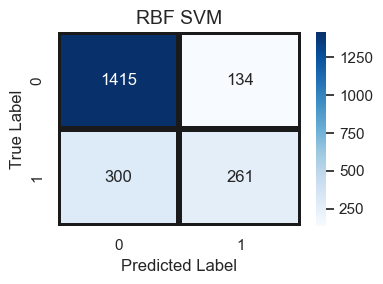

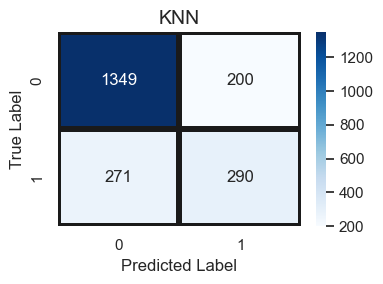

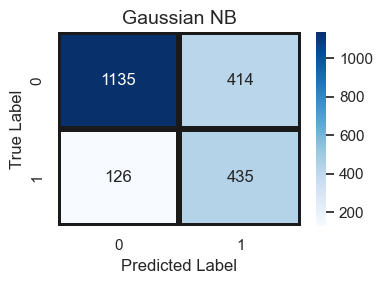

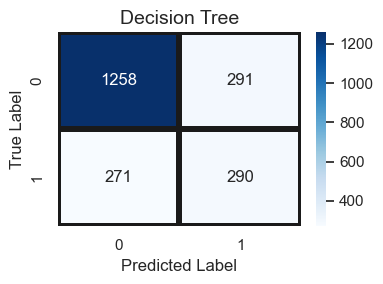

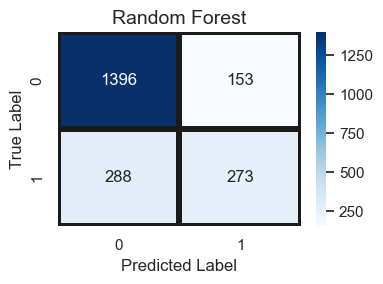

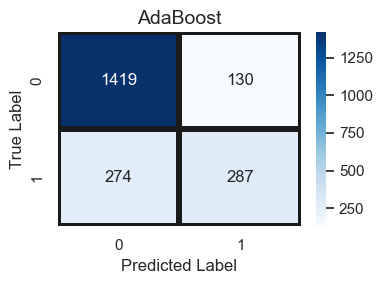

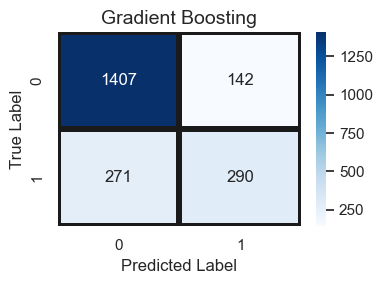

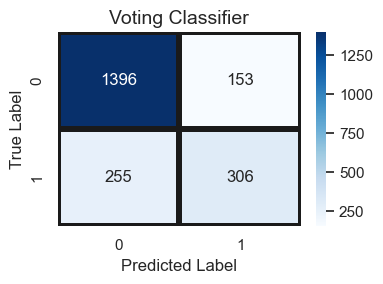

In [85]:
from sklearn.metrics import confusion_matrix

#Loop through each pipeline and plot its confusion matrix

for name, pipe in pipelines:
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)

    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, y_pred),
               annot=True, fmt='d', linecolor='k', linewidth=3, cmap='Blues')

    plt.title(name, fontsize=14)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

    


In [91]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, fbeta_score


f2_scorer = make_scorer(fbeta_score, beta=2.0, pos_label='Yes')
#Define scoring dictionary

scoring= {
    'Accuracy':'accuracy',
    'F2': f2_scorer
}

def k_fold_cross_validation(pipeline, model_name):
    scores = cross_validate(
        pipeline,
        X_train, y_train,
        cv=10,
        scoring=scoring,
        return_train_score=False
    )

    print(f"{model_name} — Accuracy: {scores['test_Accuracy'].mean():.2f} (+/- {scores['test_Accuracy'].std()*2:.2f})")
    print(f"F2 Score:  {scores['test_F2'].mean():.2f}")


for name, pipe in pipelines:
    k_fold_cross_validation(pipe, name)


Logistic Regression — Accuracy: 0.75 (+/- 0.05)
F2 Score:  0.72
Linear SVC — Accuracy: 0.79 (+/- 0.04)
F2 Score:  0.54
RBF SVM — Accuracy: 0.80 (+/- 0.03)
F2 Score:  0.50
KNN — Accuracy: 0.76 (+/- 0.03)
F2 Score:  0.51
Gaussian NB — Accuracy: 0.74 (+/- 0.05)
F2 Score:  0.70
Decision Tree — Accuracy: 0.73 (+/- 0.03)
F2 Score:  0.50
Random Forest — Accuracy: 0.79 (+/- 0.04)
F2 Score:  0.50
AdaBoost — Accuracy: 0.80 (+/- 0.04)
F2 Score:  0.53
Gradient Boosting — Accuracy: 0.80 (+/- 0.04)
F2 Score:  0.53
Voting Classifier — Accuracy: 0.80 (+/- 0.04)
F2 Score:  0.55


ROC GRAPH- This graph tell us two things.The main thing is its threshold. With each thresold how much it
grows vertically and horizontally if you increse the thresold and your start incresaing in y axis and not in x axis
that means your model is doing good in predicting true positive and not predicting the false one

In [95]:
from sklearn.metrics import roc_auc_score, roc_curve


def plot_roc_curve(pipeline, model_name):

    #fit the pipeline
    pipeline.fit(X_train, y_train)

    #Get predicted probabilities for the posititve class('Yes')
    probs=pipeline.predict_proba(X_test)[:,1]

    #Compute ROC AUC and ROC curve points

    auc_score =roc_auc_score(y_test, probs)
    fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label='Yes')

    #plot
    plt.figure(figsize=(14, 6))
    label = f"{model_name} (area = {auc_score:.2f})"
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], 'k--', label='Base Rate')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('\nFalse Positive Rate\n', horizontalalignment="center",
               fontstyle="normal", fontsize="medium", fontfamily="sans-serif")
    plt.ylabel('True Positive Rate\n', horizontalalignment="center",
               fontstyle="normal", fontsize="medium", fontfamily="sans-serif")
    plt.title(f'ROC Graph -{model_name}\n', horizontalalignment="center",
              fontstyle="normal", fontsize=22, fontfamily="sans-serif")
    plt.legend(loc="lower right", fontsize="medium")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    plt.show()


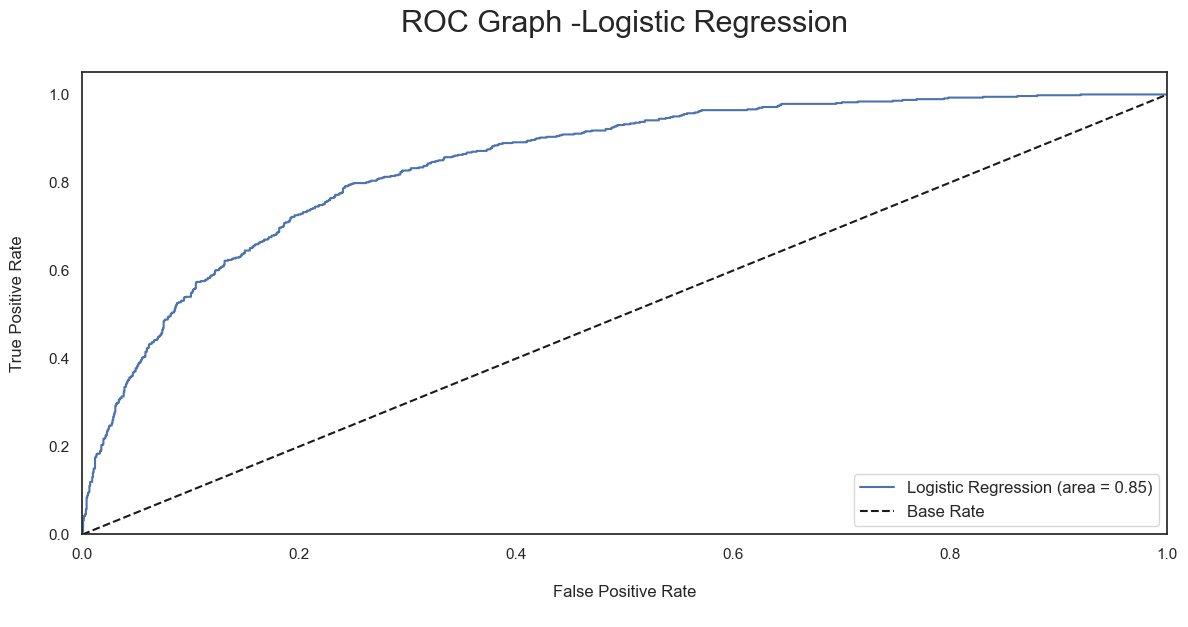

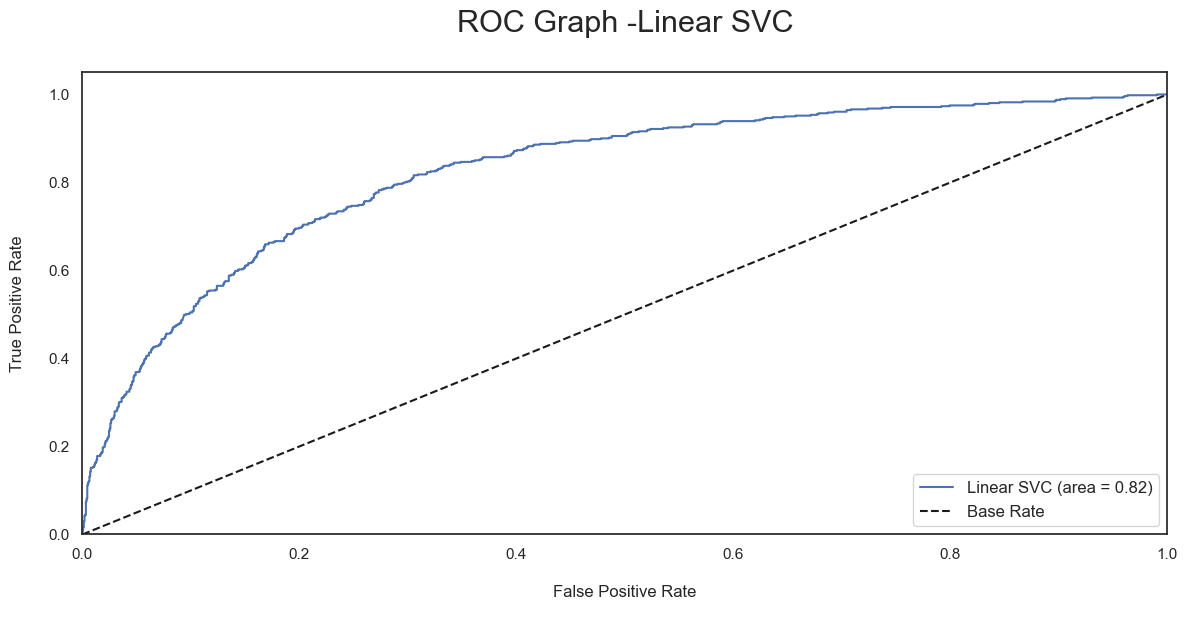

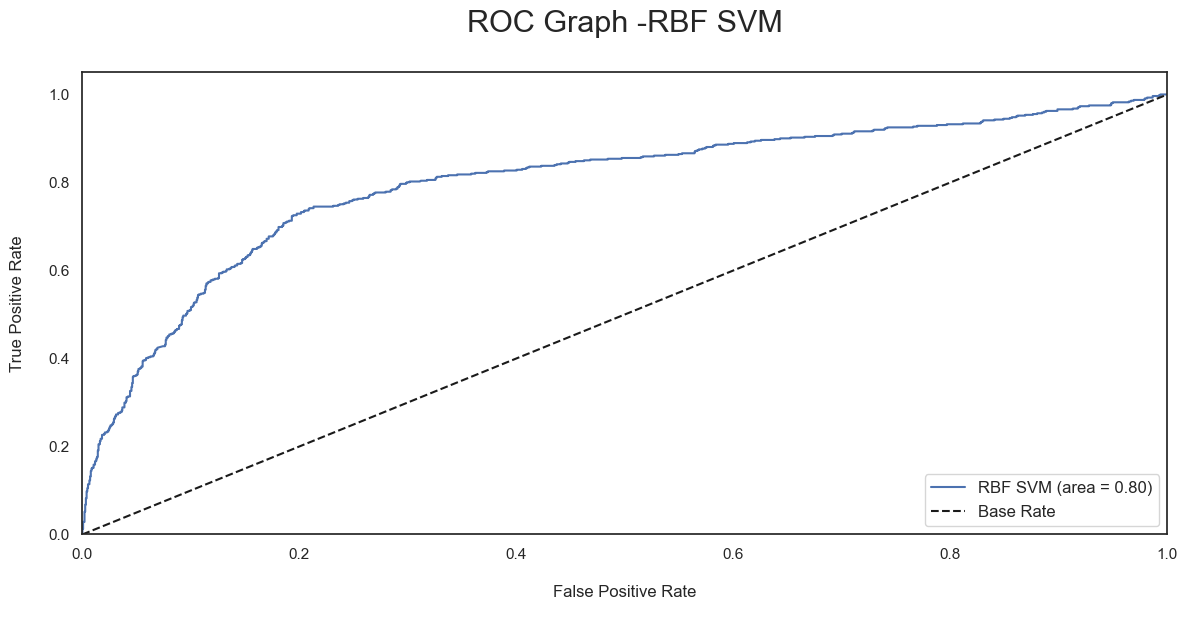

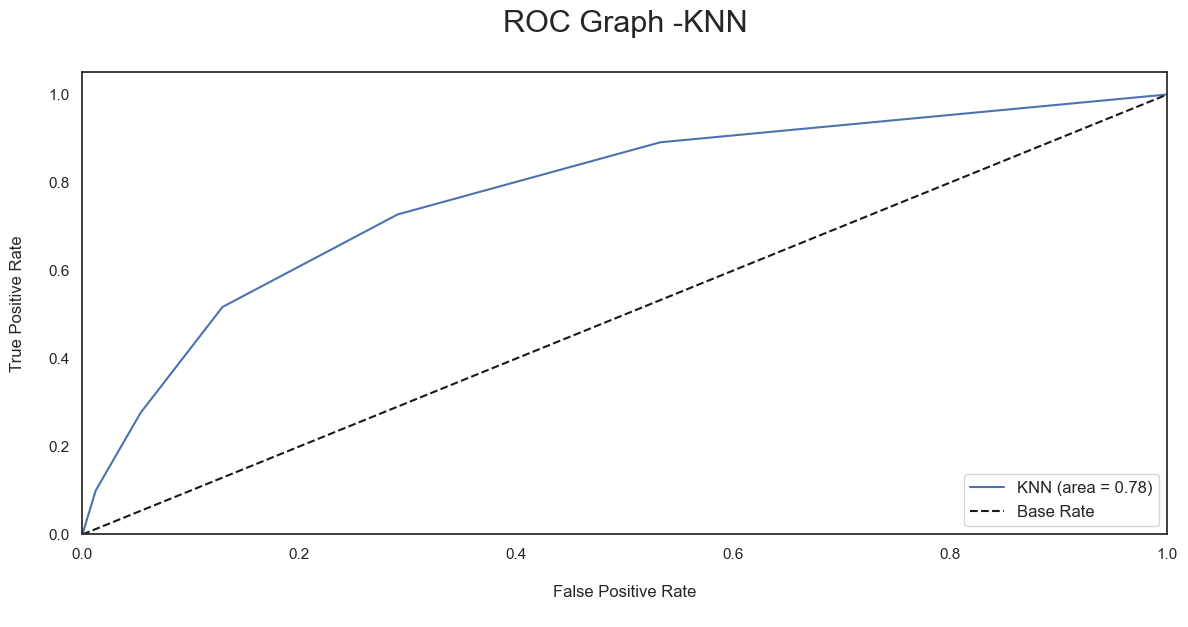

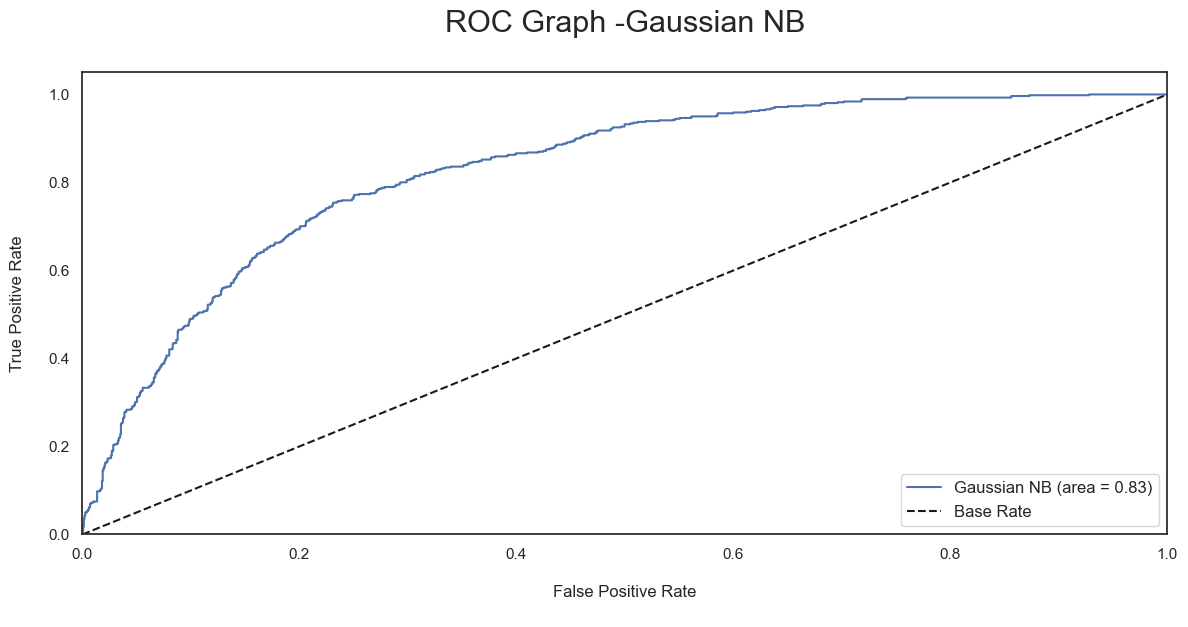

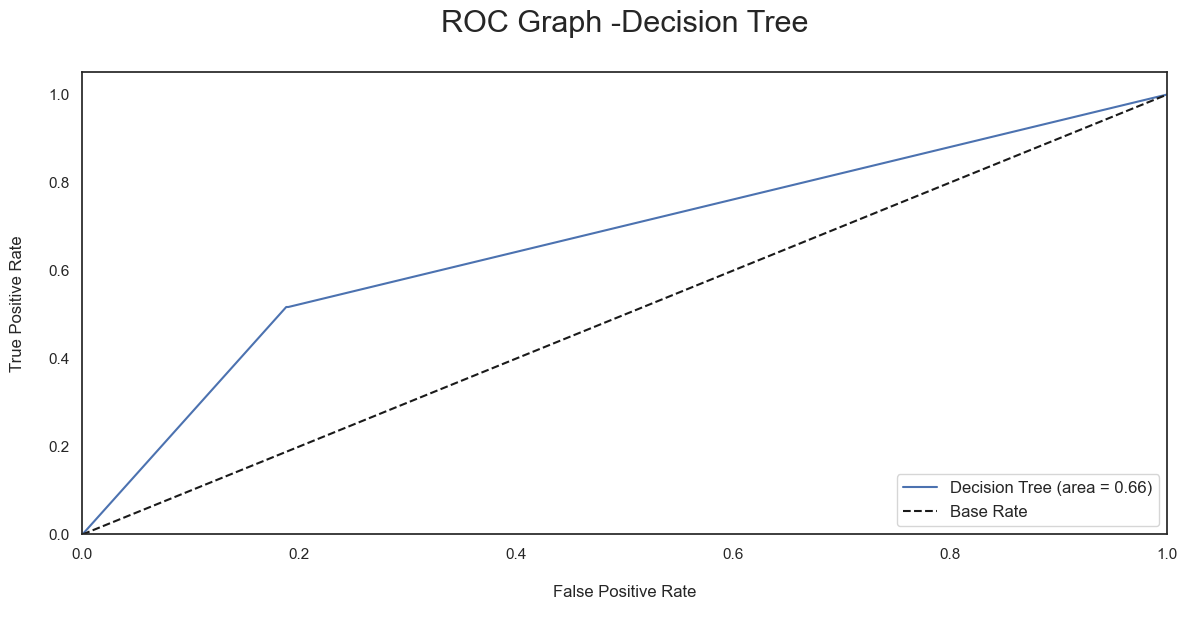

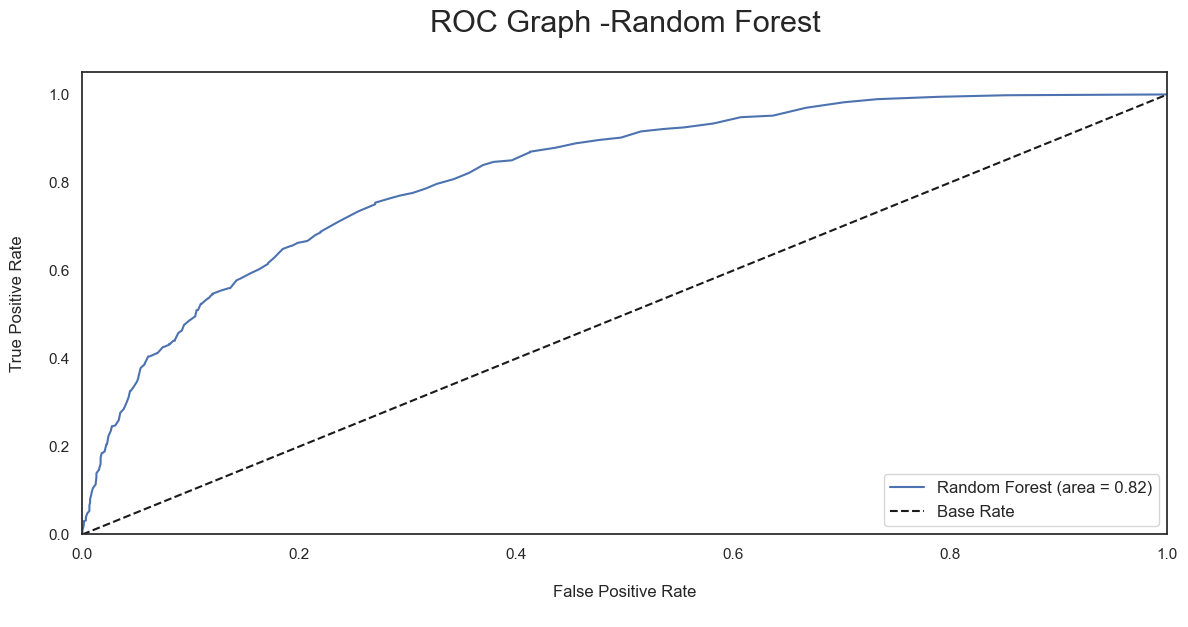

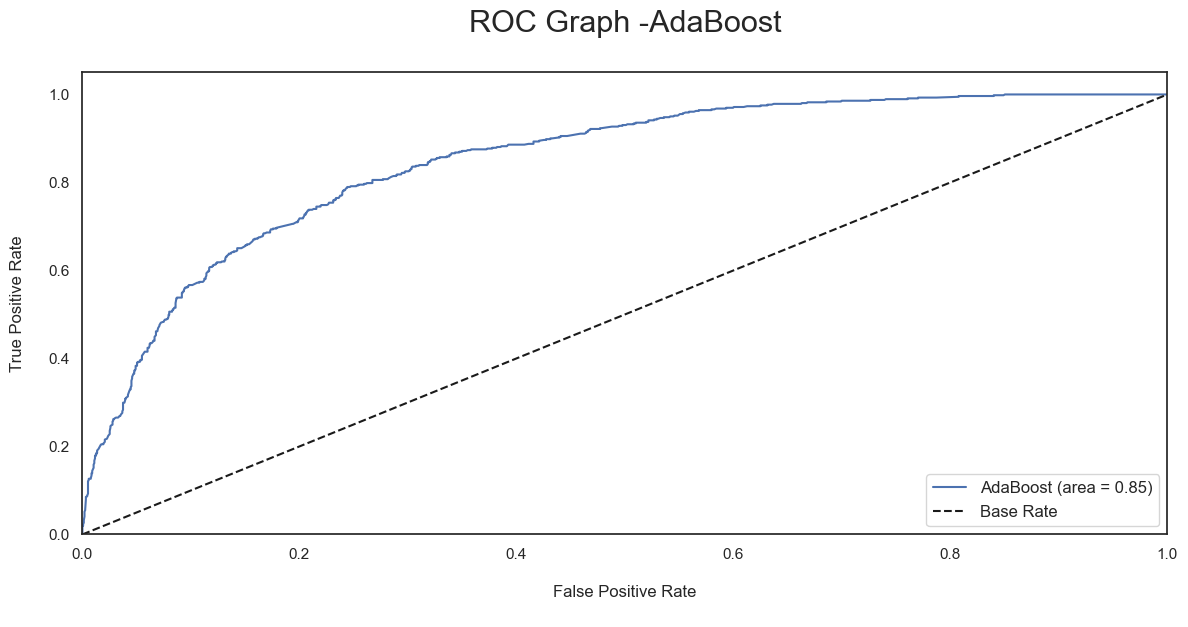

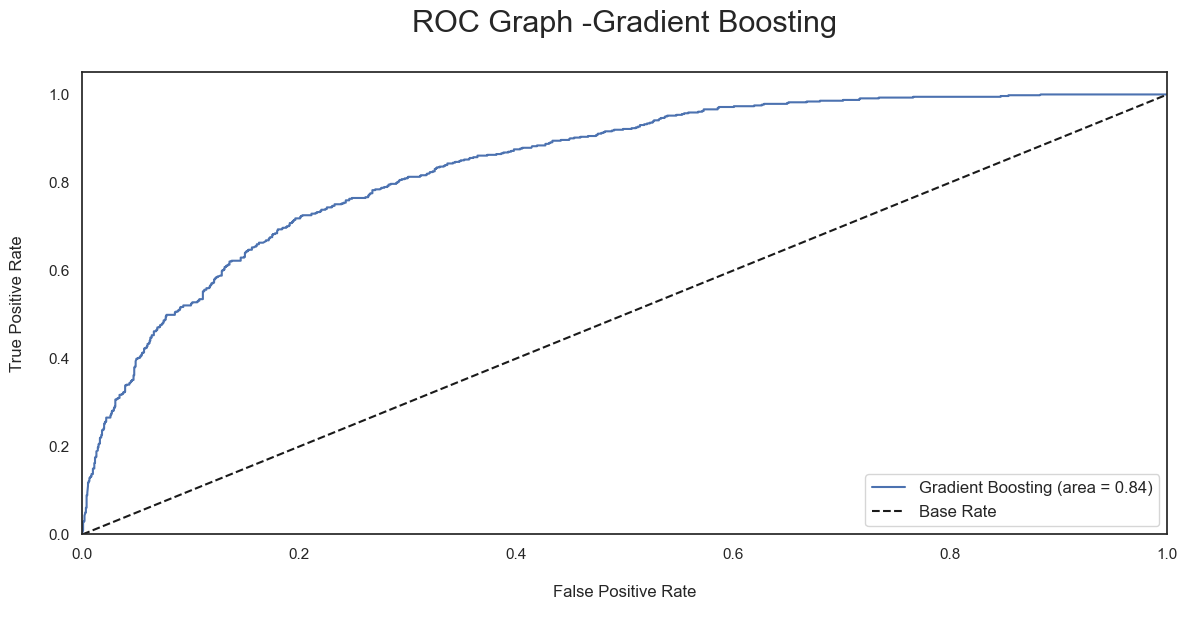

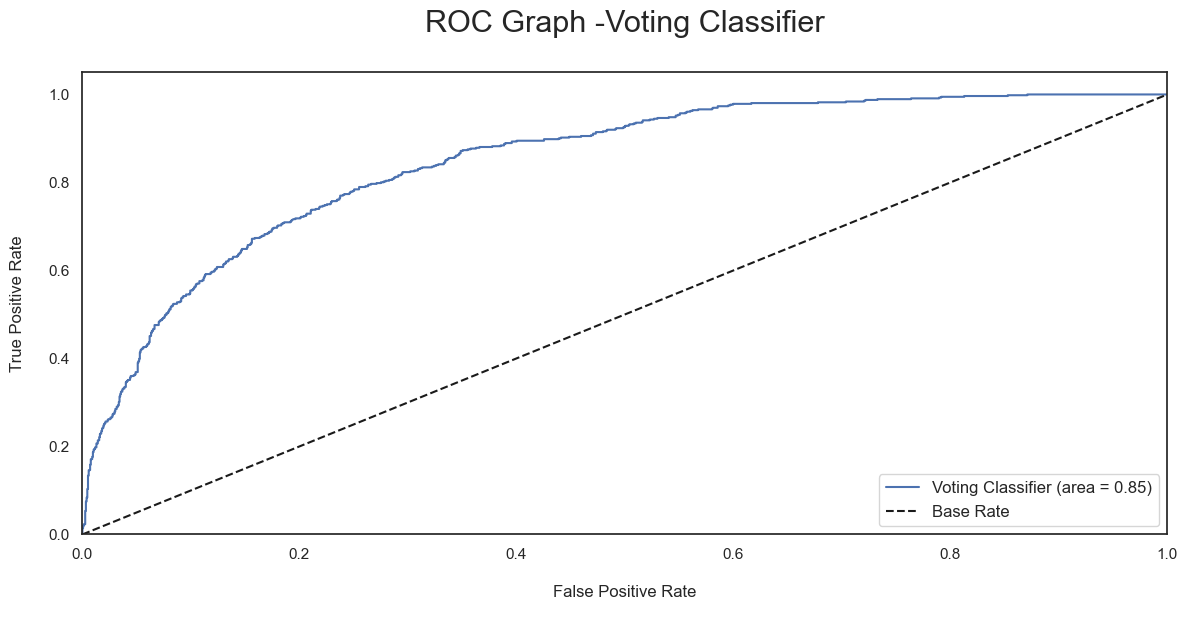

In [96]:
for name, pipe in pipelines:
    # Only plot ROC if classifier supports predict_proba
    if hasattr(pipe.named_steps['classifier'], "predict_proba"):
        plot_roc_curve(pipe, name)

In [97]:
def cvDictGen(pipelines, scr='roc_auc', X_train=X_train, y_train=y_train, cv=5):
    cvDict={}
    for name, pipe in pipelines:
        scores=cross_val_score(pipe, X_train, y_train,cv=cv, scoring=scr)
        cvDict[name]=[scores.mean(), scores.std()]
    return cvDict
        

In [98]:
cv_results = cvDictGen(pipelines, scr='roc_auc')
cv_results

{'Logistic Regression': [np.float64(0.8435168757572826),
  np.float64(0.013733821034728802)],
 'Linear SVC': [np.float64(0.8305344334852245),
  np.float64(0.020636665593145878)],
 'RBF SVM': [np.float64(0.7982408580152751), np.float64(0.016229426583421434)],
 'KNN': [np.float64(0.7678051978391887), np.float64(0.011490066882796976)],
 'Gaussian NB': [np.float64(0.8276635095062479),
  np.float64(0.009603741814373153)],
 'Decision Tree': [np.float64(0.6605959273181441),
  np.float64(0.016015774574617832)],
 'Random Forest': [np.float64(0.8265714190000303),
  np.float64(0.014157325914294378)],
 'AdaBoost': [np.float64(0.8430544008445393),
  np.float64(0.011273631970406383)],
 'Gradient Boosting': [np.float64(0.8445711160049534),
  np.float64(0.012523548877551452)],
 'Voting Classifier': [np.float64(0.8480489248058529),
  np.float64(0.012460989590606234)]}

Predicting feature importance 

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

gb_pipeline = Pipeline([
    ("prep", preprocessor),  # your ColumnTransformer
    ("classifier", GradientBoostingClassifier(random_state=42))
])

# 1. Fit the pipeline
gb_pipeline.fit(X_train, y_train)

# 2. Get feature names after preprocessing
feature_names = gb_pipeline.named_steps['prep'].get_feature_names_out()

# 3. Get importances from the classifier
importances = gb_pipeline.named_steps['classifier'].feature_importances_

# 4. Combine into a DataFrame
feature_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)

feature_importances


Feature  Importance
0                                  num__tenure    0.262548
1                              le__TechSupport    0.153684
2                           le__OnlineSecurity    0.124111
3             ohe__InternetService_Fiber optic    0.093449
4                          num__MonthlyCharges    0.083610
5                            num__TotalCharges    0.079405
6          ohe__PaymentMethod_Electronic check    0.049229
7                       ohe__Contract_Two year    0.048149
8                       ohe__Contract_One year    0.043385
9                            le__SeniorCitizen    0.012445
10                           le__MultipleLines    0.011977
11                        le__PaperlessBilling    0.009689
12                            le__OnlineBackup    0.009027
13                        le__DeviceProtection    0.004636
14                            le__PhoneService    0.003726
15                             le__StreamingTV    0.002486
16                         le__StreamingMovies    0.001956
17                                 le__Partner    0.001937
18  ohe__PaymentMethod_Credit card (automatic)    0.001621
19                              le__Dependents    0.001227
20                                  le__gender    0.001215
21             ohe__PaymentMethod_Mailed check    0.000382
22                     ohe__InternetService_No    0.000105

In [101]:
from sklearn.ensemble import AdaBoostClassifier


ada_pipeline = Pipeline([
    ("prep", preprocessor),
    ("classifier", AdaBoostClassifier(random_state=42))
])


In [102]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter space
ada_params = {
    "classifier__n_estimators": [10, 50, 100, 200, 420],
    "classifier__learning_rate": [0.001, 0.01, 0.1, 0.3]
}

# Setup randomized search
ada_search = RandomizedSearchCV(
    estimator=ada_pipeline,
    param_distributions=ada_params,
    n_iter=5,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=1
)

# Fit on training data
ada_search.fit(X_train, y_train)

# Best model and score
print("Best Parameters:", ada_search.best_params_)
print("Best ROC AUC:", ada_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 0.3}
Best ROC AUC: 0.8451818236420356
